# 3.3 Atlas of Visualisations


This section is a quick overview of various types of plots and charts typically used in data visualisation. We will provide guidance of which types of plots are the best for different types of data and what to be careful of when using a given chart.


We emphasise that figures are a graphical layer on top of your data. **The nature of the figure should be dictated by the nature of the data**.

Though different types of data lend themselves to different styles of charts, the figure components discussed in _Section 3.2_ apply to all figures. All figures should be appropriately scaled, coloured, and labelled.


The content discussed in this section is largely based on Chapters 5 to 16 from the book [Fundamentals of data visualisation](https://clauswilke.com/dataviz/visualizing-proportions.html#a-case-for-pie-charts) by Claus Wilke. Due to restrictions of time this is a high-level overview of some of those ideas, therefore we highly encourage you to look at those chapters to get a deeper understanding of best practices for data visualisation.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
#
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_style("white")

## Visualising amounts

When visualising amounts we interested in the magnitude of a group of numbers, e.g: we have a set of categories and a quantitative value for each category.

### Bar plots

Bars plots are a good option when the dataset we want to visualise contains **numerical values for a set of categories**.

````{margin}
```{note}
  Points to consider when using **bar plots** in a figure:
- The **bar length** is proportional to the amount shown, therefore bars need to start at zero.
- **Labels** identifying each bar can take up a lot of horizontal space. In this case it is better to use horizontal bars.
- The **order** in which the bars are arranged is important. If the bars represent unordered categories, order them by ascending or descending data values.
- Bar plots are not good for very large datasets. If the **number of categories** is very large the resulting figure can become too busy.
```
````

#### **Examples**

We can use the US Covid-19 vaccination data from the previous section. Bar plots are excellent candidates in this case given that we are visualising amounts (share of population of fully vaccinated people)
for different categories (US entity or state).

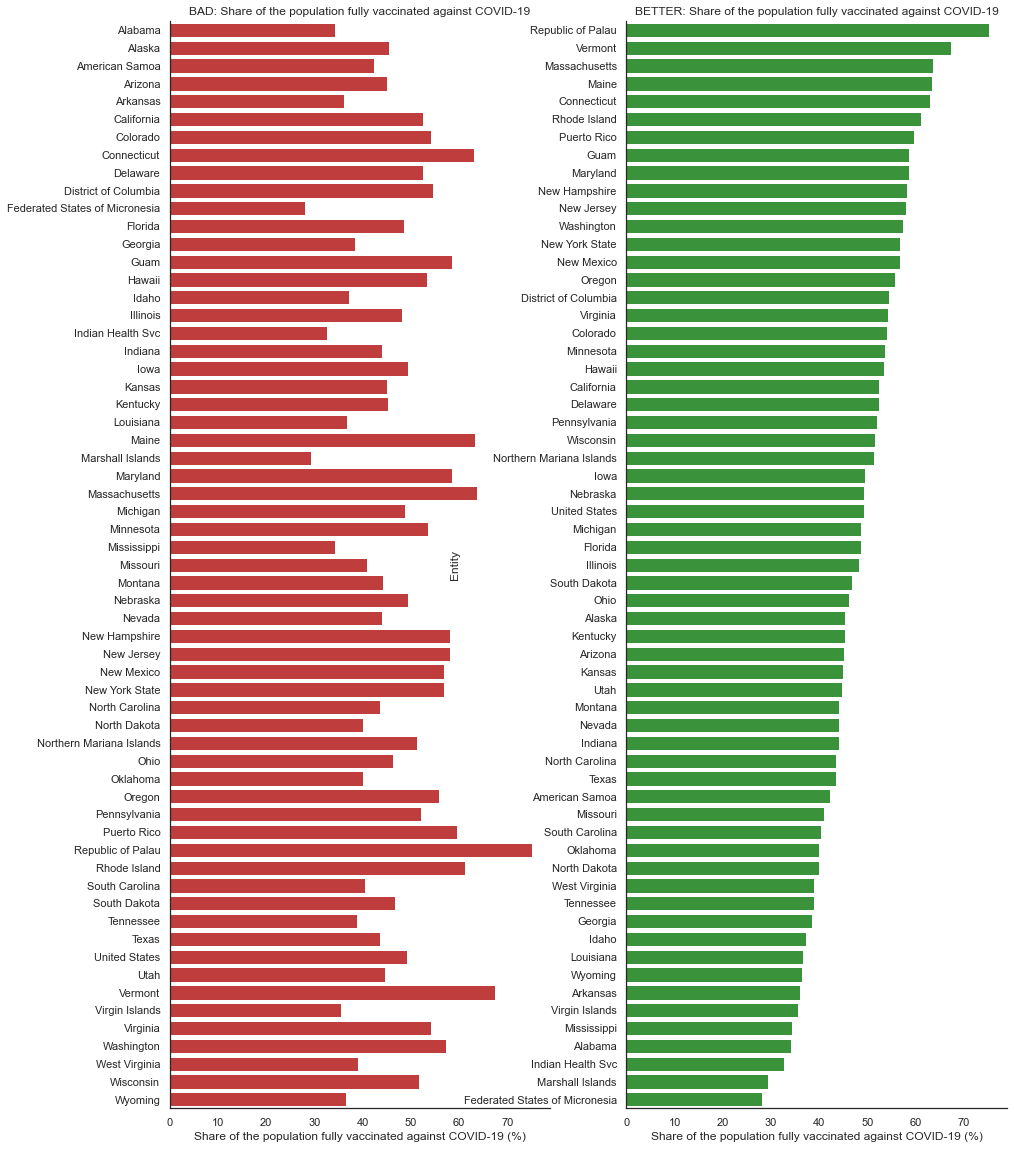

In [2]:
# read the data from here https://ourworldindata.org/us-states-vaccinations
df_vaccination = pd.read_csv('data/us-covid-share-fully-vaccinated.csv', sep=',', parse_dates=['Day'])

# look at max day available for cumulative vaccination data
max_day = df_vaccination['Day'].max()
df_vaccination_max = df_vaccination[df_vaccination['Day']==max_day]

# Example of a better plot. 
df_vaccination_sorted = df_vaccination_max.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

# Example of an non useful plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
# Load the dataset
sns.barplot(ax = ax1, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_max, color='tab:red',errwidth=0)
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax1.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('State')
sns.barplot(ax=ax2, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_sorted, color='tab:green',errwidth=0)
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax2.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('')
sns.despine(left=False, bottom=False)
plt.show()


In the figure on the left the bars are ordered alphabetically, is useful if someone wanted to just look for a particular state. However, if the message we want to communicate relates to which US states or entities are more or less effective at vaccinating their population, the one in the right is a better figure.

### Dot plots

Dot plots are an alternative to bar charts and have the advantage that they do not have to start at zero. Because of this,
dot plots can be useful when you want to visualise **numerical values for a set of categories with small differences between categories**.

````{margin}
```{note}
Similarly to bar plots, **dot plots** should be **ordered** by data values (for un-ordered categories) and we should beware of visualising datasets with a very **large number of categories**.
```
````
#### Example

We can use the same dataset as above for this example. The benefit of dot plots is that, by not having to start at zero, we can better grasp the differences between vaccination rates in different entities.

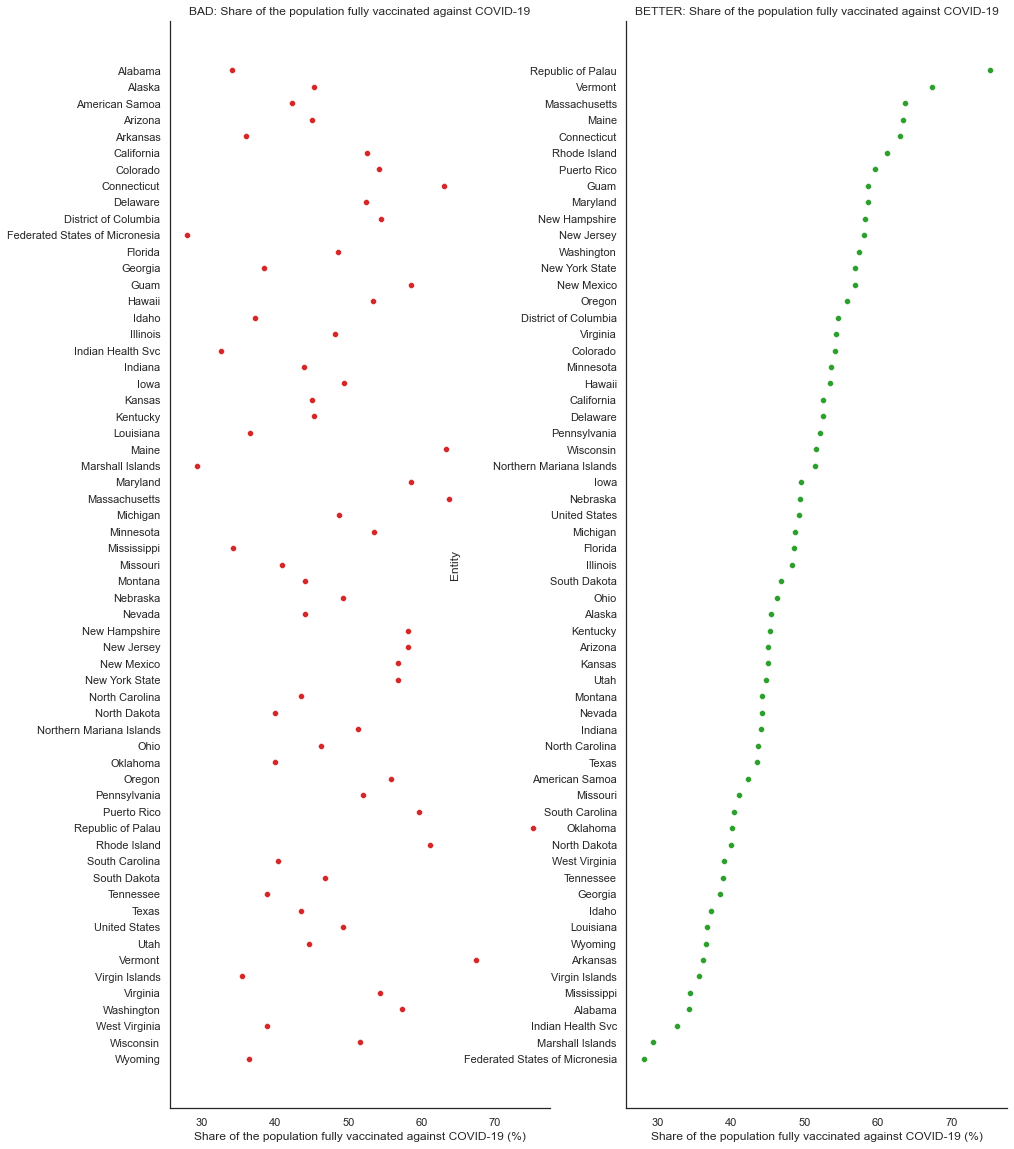

In [3]:
# Example of an non useful plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 20))
# Load the dataset
sns.scatterplot(ax = ax1, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_max, color='tab:red')
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax1.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('State')
sns.scatterplot(ax=ax2, x="people_fully_vaccinated_per_hundred", y="Entity", data=df_vaccination_sorted, color='tab:green')
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19',fontsize=12)
ax2.set_xlabel('Share of the population fully vaccinated against COVID-19 (%)')
ax1.set_ylabel('')
sns.despine(left=False, bottom=False)
plt.show()


Similarly to bar plots, vertical columns ordered by amount provide a better figure. 

### Heatmaps 

You can use heatmaps when interested in highlighting a trend in a dataset with **numerical values for a set of categories and for different groups**.


````{margin}
```{note}
Some points to beware of when using **heatmaps**:

- Similarly to bar plots, the **order of the categorical data** values matters.
- Heatmaps can be easy to misread, for example the **color scale can create a misperception of the magnitude of the data.** The two most common ranges of colors to use in heatmaps are sequential and diverging scales.
- Heatmaps should primarily be used to **illustrate patterns**, not to replace tables.
```
````
#### Example:

For this example we can use the US vaccination data time series (in the examples above we only selected the cumulative value in the last available day). A heatmap will help us see the trends on increase of vaccination rates for different states.
Again, in here we are sorting the entities by the one that has the highest vaccination rate at the last day of the time series.

Text(1159.5440340909088, 0.5, '')

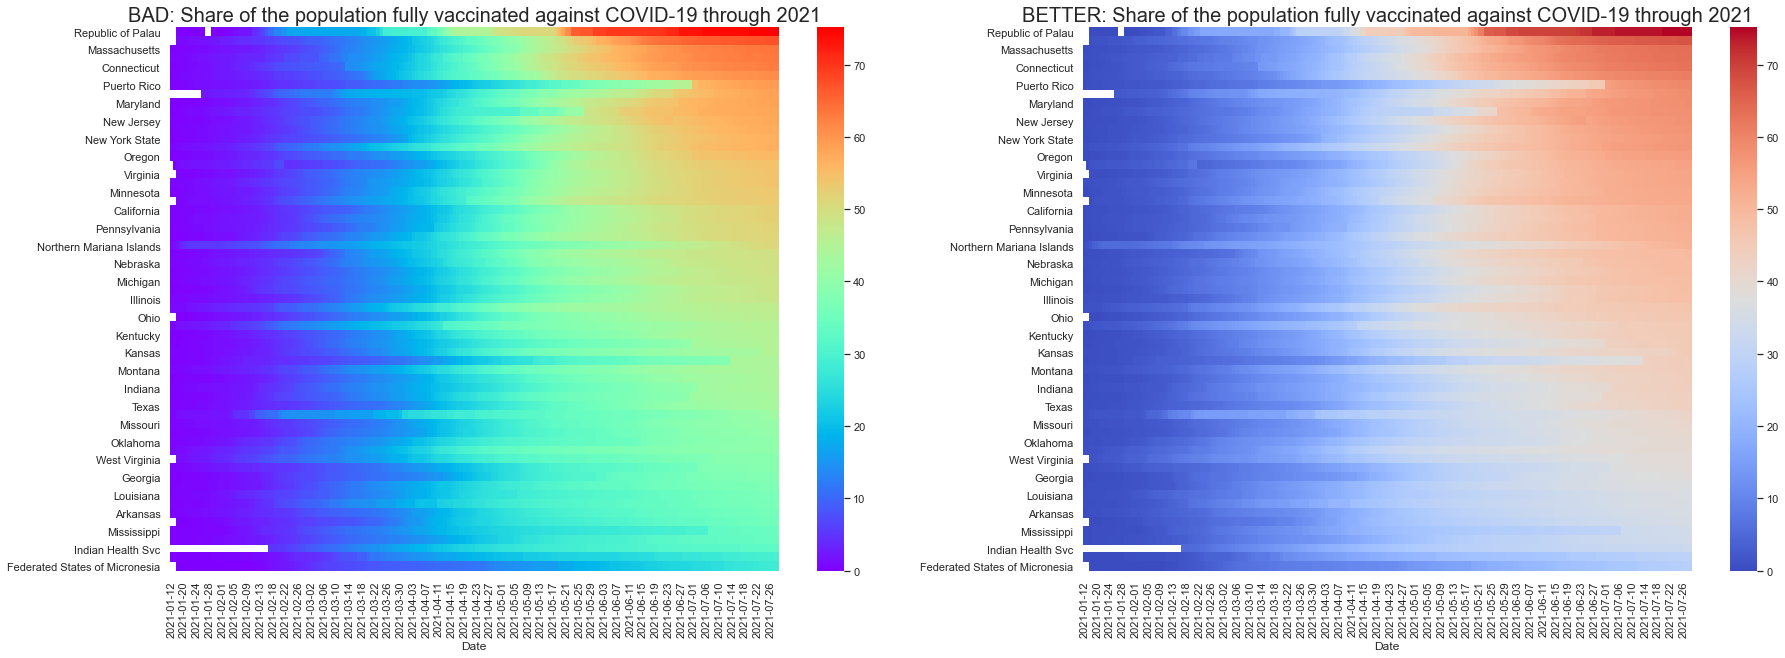

In [4]:
df_vaccination['Date'] = df_vaccination['Day'].dt.date

#creating a pivot table for easy heatmap visualisation
df_vax = pd.pivot_table(data=df_vaccination,
                    values='people_fully_vaccinated_per_hundred',
                    columns='Date',
                    index='Entity')

# ordering columns by percentage of vaccination
df_vax.index = pd.CategoricalIndex(df_vax.index, categories= df_vaccination_sorted.Entity)
df_vax.sort_index(level=0, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.set_title('BAD: Share of the population fully vaccinated against COVID-19 through 2021',fontsize=20)
sns.heatmap(df_vax, cmap = 'rainbow', cbar=True, ax=ax1)
ax1.set_ylabel('')
ax2.set_title('BETTER: Share of the population fully vaccinated against COVID-19 through 2021',fontsize=20)
ax2 = sns.heatmap(df_vax, cmap='coolwarm', cbar=True, ax = ax2)
ax2.set_ylabel('')


In the figure in the left we are using a rainbow color scale, which can be very popular in figures of scientific papers but it can be misleading. One of its problems is that people can see the brightest color as a peak. Also, a rainbow scale can create a misperception of the magnitude of the data. Abrupt changes between different colours (green to yellow or blue to green) can make the values seem distant, while they are not necessarily far from each other.

In the figure on the right we are using a diverging scale that shows color progression in two directions from blue to red. This scale has less hues and intensities than the rainbow color scale and is also a more friendly scale for colour-blind people. For more tips about colours and heatmaps, look at this [blog post](https://blog.bioturing.com/2018/09/24/heatmap-color-scale/).

## Distributions

We use these figures to understand how one or many particular variables are distributed in a dataset.

### Histograms

Histograms are used to show **frequencies of occurrences of a continuous variable**. Histograms are generated by **binning the data** (grouping the data values into a number of ranges), so their visual appearance depends on the choice of the bin width.

````{margin}
```{note}
When working with histograms it is best practice to always **explore multiple bin widths**.
```
````

**Examples**

For the following examples we will be using the Covid-19 data from Our World in Data that we used in the previous section. Let's now look at distributions of the life expectancy from that dataset.

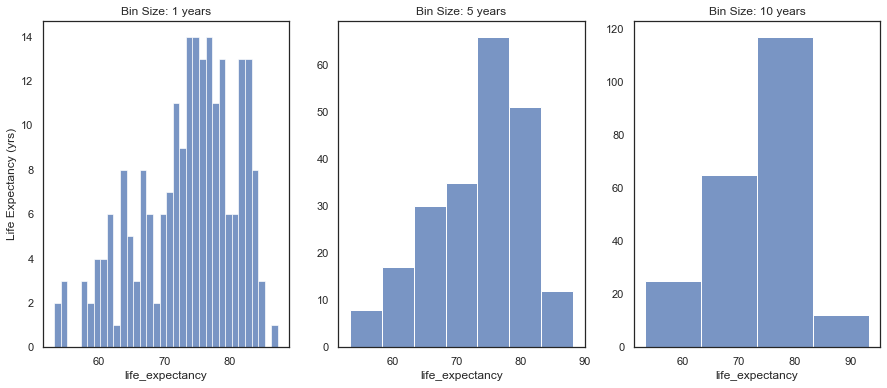

In [5]:
# To illustrate these we will use data on Covid-19 hosted by our world in data. 
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, parse_dates=['date'])

# remove data with null values
df_countries = df[(df['continent'].notna())]

# only keep columns with life expectancy and location, removing the duplicates 
#(there can be several entry per country given that the data is a time series)
df_life_exp = df_countries.filter(regex="loc|life *").drop_duplicates()

# plot histogram for different bins
f, axes = plt.subplots(1,3,figsize =(15,6))
bin_years = [1,5,10]

for (i, b) in enumerate(bin_years):
    sns.histplot(data = df_life_exp, x='life_expectancy', binwidth=b, ax=axes[i])
    axes[i].set_title(f"Bin Size: {b} years")
    axes[i].set_ylabel('Life Expectancy (yrs)')
    if i>0:
        axes[i].set_ylabel('')
plt.show()

In this case, the 1 year bin size bin can be too small for the distribution, the histogram seems peaky and has ranges without data. On the other hand, a histogram with a bin size of 10 years loses some of the information on the shape of the data. 

### Kernel density figures 

Kernel density estimation (KDE) is a way to estimate the probability density function of a random variable. We can use it to create **density curves of a continuous variable**. 

````{margin}
```{note}
Kernel density plots are highly sensitive to a banwidth parameter used to estimate the density function. It behaves similarly to the bin width in histograms and can affect the appaearance of the figure. As a result the plot may misrepresent the data leading to incorrect conclusions. Furthermore, KDE can produce the appearance of data where none exists (in particular in the tails of the distribution), again leading to incorrect conclusions.
```
````

#### Example

Let's use the same life expectancy variable from our dataset to create a density curve.

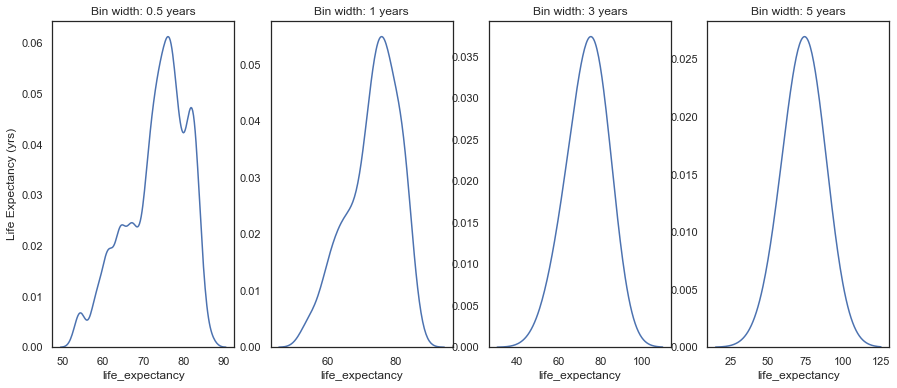

In [6]:
f, axes = plt.subplots(1,4,figsize =(15,6))

band_width = [0.5,1,3,5]

for (i, b) in enumerate(band_width):
    sns.kdeplot(data = df_life_exp, x='life_expectancy', bw_adjust=b, ax=axes[i])
    axes[i].set_title(f"Bin width: {b} years")
    axes[i].set_ylabel('Life Expectancy (yrs)')
    if i>0:
        axes[i].set_ylabel('')
                    
plt.show()


### Box or violin plots

We can use Box or violin plots to **visualise and compare several groups of distributions**. Box plots show summary statistics such as mean/median and inter-quartile range whereas violin plots show the range and shape distribution of the data.

````{margin}
```{note}
Violin plots use kernel density estimates and need to have enough data points in each group to justify showing the point densities as smooth lines. 
```
````
#### Examples

Let's compare the life expectancy distribution for different continents. We could do this by superposing the distributions in one canvas or by using box or violin plots.

Text(0.5, 0, 'Continent')

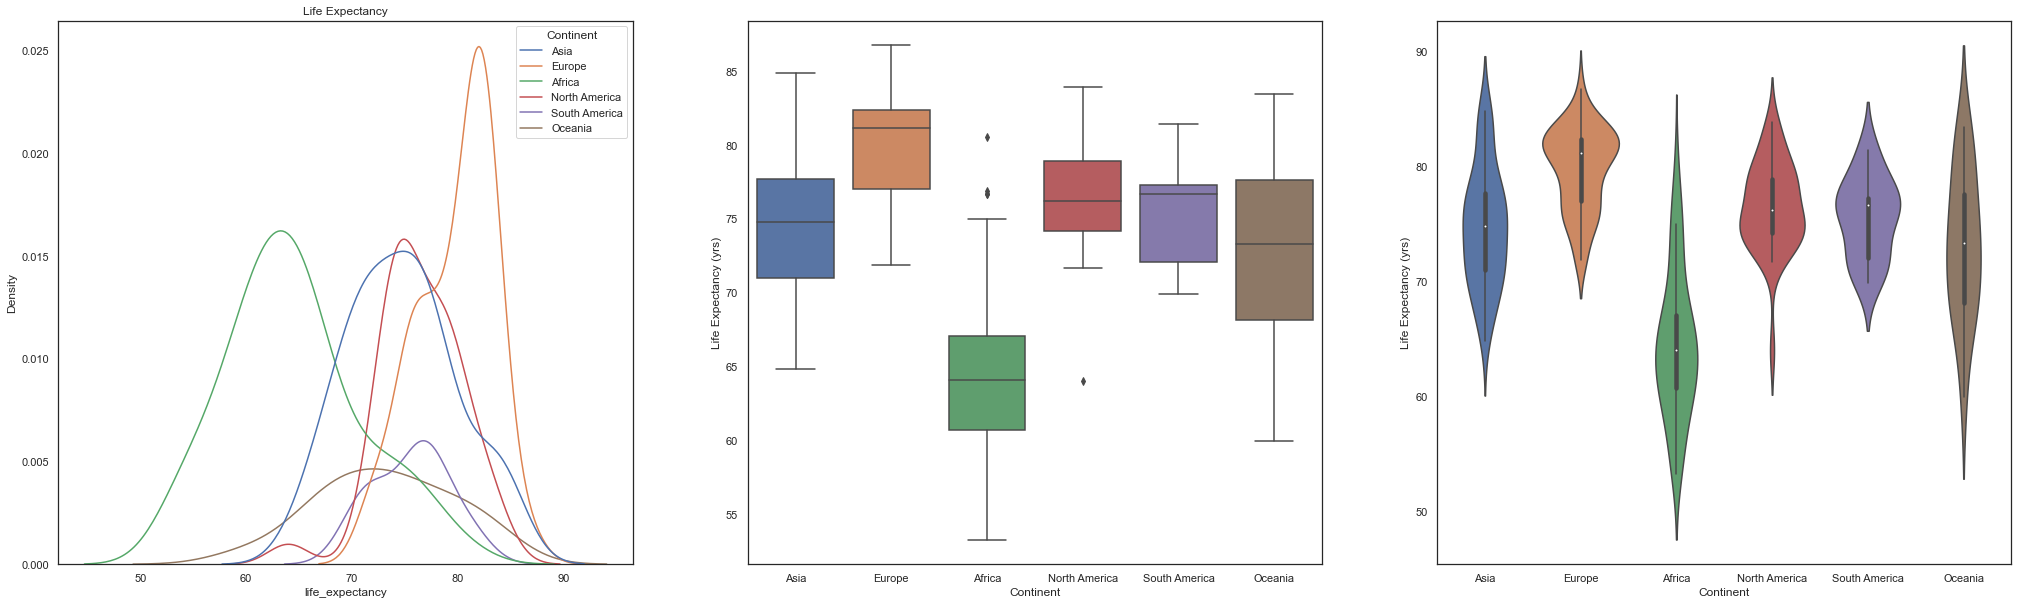

In [7]:
continents = np.unique(df_countries['continent'])

f, axes = plt.subplots(1,3,figsize =(35,10))

#for continent in continents:
    
df_life_exp = df_countries.filter(regex="continent|life *").drop_duplicates()

sns.kdeplot(data = df_life_exp, x='life_expectancy', bw_adjust=1, ax=axes[0],label='Continent',hue='continent')
axes[0].set_title(f"Life Expectancy")
axes[0].set_ylabel('Density')
axes[0].legend_.set_title("Continent")
sns.boxplot(x="continent", y="life_expectancy", data=df_life_exp, ax=axes[1])
axes[1].set_title(f"")
axes[1].set_ylabel('Life Expectancy (yrs)')
axes[1].set_xlabel('Continent')
sns.violinplot(x="continent", y="life_expectancy", data=df_life_exp, ax=axes[2])
axes[2].set_title(f"")
axes[2].set_ylabel('Life Expectancy (yrs)')
axes[2].set_xlabel('Continent')

Each figure in this example gives us some different view from the data. The density curves are great when comparing a few distributions
but in this figure they feel busy. The box plot is a better tool to compare the summary statistics of these distributions, however we are missing information compared to the shape
that the violin plot is providing.

### Ridge line plots

Ridge line plots can help us visualise and **compare several distributions at the same time in a horizontal axis** without overwhelming the figure by superposing it in the same canvas (as shown in the figure above). Ridgeline plots are very useful if we want to **show trends in distributions over time**.

#### Example

Let's compare the shape life expectancy distribution for different continents using ridge line plots.

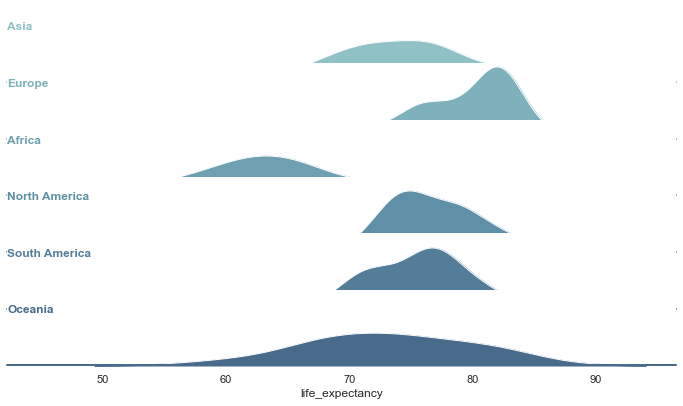

In [8]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_life_exp, row="continent", hue="continent", aspect=10, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "life_expectancy",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "life_expectancy", clip_on=False, color="w", lw=1, bw_adjust=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="top", transform=ax.transAxes)


g.map(label, "life_expectancy")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## Proportions

Figures that show how some group, entity or amount breaks down into individual pieces that each represent a proportion of a whole.

### Grouped bars 

We can use grouped bar charts when our dataset has **numerical values for a set of categories for different groups**. When using grouped bars beware that they can contain a lot of information at once and be confusing, so there might be a better way of visualising the message you want to transmit.

### Staked bars

We can use grouped bar charts when our dataset has **numerical values for a set of categories for different groups when the sum of the amounts represented by the individual groups is important for the message.**. The can be useful when the point is to show that a value is the sum of other values, but you’re only interested in comparing the totals.

When using grouped bars beware they get harder to read the more segments each bar has and that they do not allow for an easy visual comparison of relative proportions.

### Pie charts

In general, pie charts can work well when we want to highlight simple fractions between a small number of categories. They also work well when we have very small datasets. 

A summary of the various pros and cons of pie charts, stacked bars, and side-by-side bars extracted from the book Fundamentals of data visualisation can be found in this [link](https://clauswilke.com/dataviz/visualizing-proportions.html#tab:pros-cons-pie-bar).

## Relationships between two or more variables

### Scatter plots

Scatter plots are a common visualisation tool and allow us to explore relationships between two quantitative variables.


#### Example

The relationship between life expectancy of a given country and its human development index has a very clear association that is visible in the scatter plot.

Text(0.5, 0, 'Human development index')

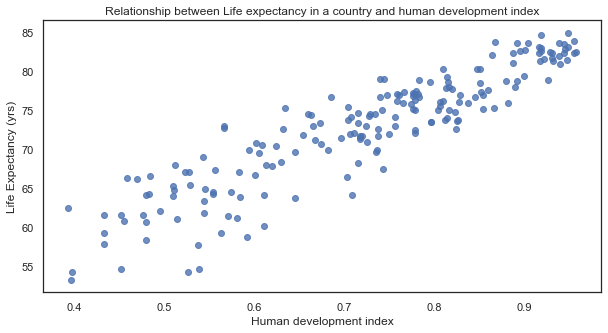

In [14]:
# only keep columns with life expectancy and human development index, removing the duplicates 
#(there can be several entries per country given that the data is a time series)
df_life_exp_hdi = df_countries.filter(regex="human_development_index|life *").drop_duplicates()

f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x=df_life_exp_hdi["human_development_index"], y=df_life_exp_hdi["life_expectancy"],fit_reg=False)
ax.set_title(f"Relationship between Life expectancy in a country and human development index")
ax.set_ylabel('Life Expectancy (yrs)')
ax.set_xlabel('Human development index')

### Correlograms

When we want to explore the associations among several quantitative variables, using only scatter plots can become unmanageable. In this case, it is more useful to visualise the correlation between pairs of variables rather than the raw data. This is where correlograms come to use, they are the visualizations of correlation coefficients of a number of variables.


#### Example
Lets explore the relationship between some of the variables available in the Covid-19 dataset from Our World in Data. For example the relationships between a given country population density, gdp per capita, extreme poverty, life expectancy, etc .

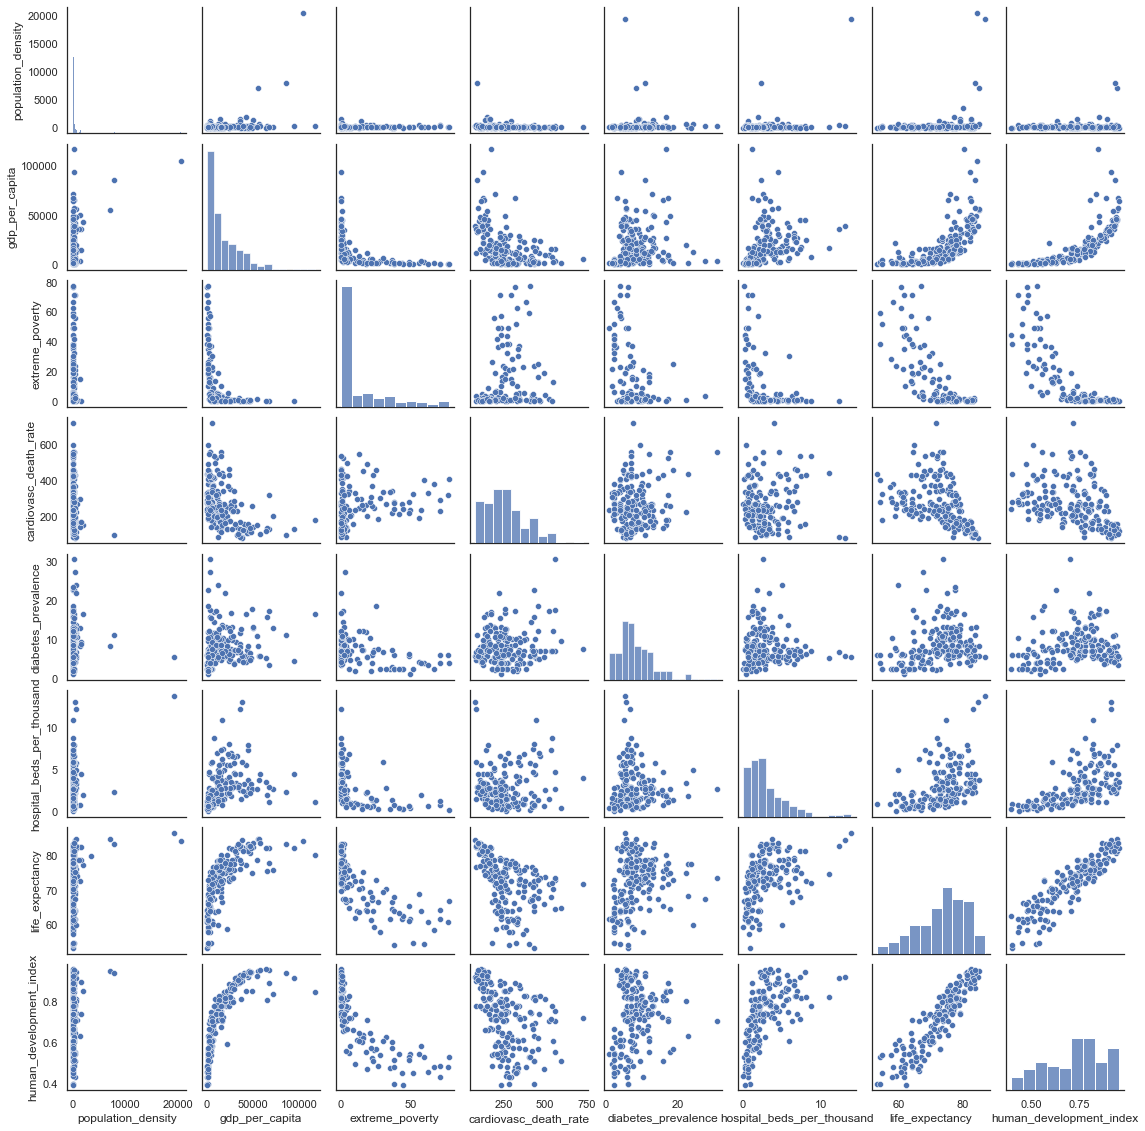

In [10]:
df_correlations = df[['population_density',
       'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence',
        'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']].drop_duplicates()
sns.pairplot(df_correlations, dropna = True,height=2)

As stated above, when we have many variables scatter plots can be overwhelming. We could use the correlogram to summarise the information relevant to the strength of the relationships between the variables. 

<AxesSubplot:>

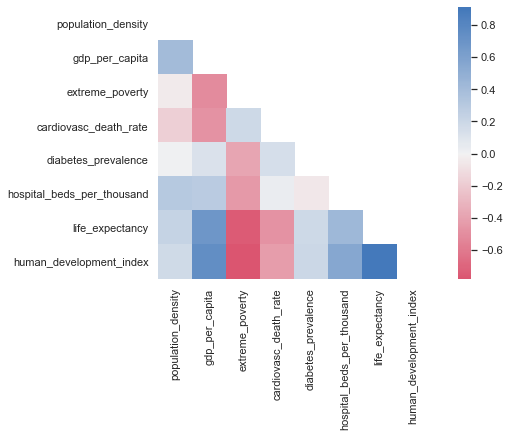

In [11]:
import numpy as np

f, ax = plt.subplots(figsize=(10, 5))

corr = df_correlations.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0,
            square=True,cmap=sns.diverging_palette(5, 250, as_cmap=True))

Note that this kind of figure has the disadvantages of heatmaps, e.g. it can be hard to map the color scale to numbers and vice versa.
Also, finding the highest negative and positive correlations requires finding the strongest red and blue by carefully scanning the entire grid.
There are some ways of improving these plots. You can find some examples [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec).

### Slopegraphs

Slopegraphs can be useful to show a two-step change of a given variable. They can be used with either continuous or categorical data.

````{margin}
```{note}
Slopegraphs can show for example how values have changed over a period of time or which data points are markedly different across two categories, and in which direction.
```
````
#### Examples

Lets use again the US vaccination data we were using in the first examples. Lets visualise and compare how the states with lowest vaccination rates have been progressing in the last month, a slopegraph is an ideal tool for this goal. 

In [12]:
# lets select only the ones with the lowest vaccination rate.
df_vaccination_low10 = df_vaccination[df_vaccination['Entity'].isin(df_vaccination_sorted.Entity[45:])]
df_slope = df_vaccination_low10[(df_vaccination_low10['Day']=='28-07-2021') | (df_vaccination_low10['Day']=='2021-06-28')]

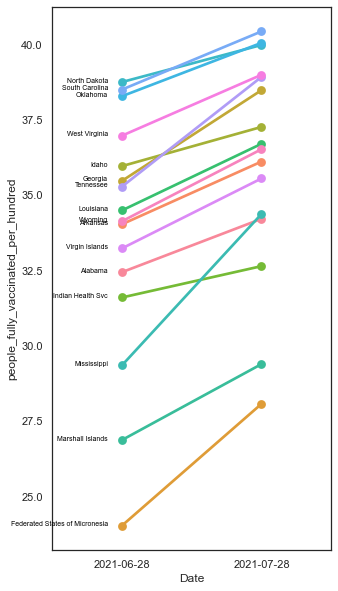

In [13]:
f, ax = plt.subplots(figsize=(5, 10))

ax = sns.pointplot(x="Date", y='people_fully_vaccinated_per_hundred', hue="Entity",
                   data=df_slope)
plt.legend([],[], frameon=False)

entity = ''
# add annotations one by one with a loop
for line in range(0,df_slope.shape[0]):
    if entity!=df_slope.Entity.iloc[line] :
        plt.text(-0.1, df_slope.people_fully_vaccinated_per_hundred.iloc[line], df_slope.Entity.iloc[line], horizontalalignment='right', color='black',size='xx-small')
  
    entity = df_slope.Entity.iloc[line]
plt.show()

## Uncertainty

In Data Science we aim to transform data and domain knowledge into insight. Any insight always has an uncertainty associated with it. Communicating insight without uncertainty is a job half done, however things like errors, confidence intervals, and likelihoods are not always present in data visualisation, which leads to judgements based on simplified summaries expressed as means, medians, or extremes. Uncertainty is a complex topic and visualising it can be a very challenging but important task.

A good example of a field that has embraced communicating risk and uncertainty is the one of weather forecasting. 
In this case failing to communicate uncertainty of weather predictions can result in the public losing faith in weather warnings and refusing to comply with evacuation or preparation orders when this is necessary. 

Another example is a very current one, the Covid-19 pandemic, which has been characterised for the vast traffic in official and unofficial information and claims based on data and statistical models. A lot can be said in how effective has been the communication of uncertainty of these models, but shortcomings in this area [has been exploited by media outlets](https://www.dailymail.co.uk/news/article-9748975/SAGE-scientist-admits-modelling-spooked-No10-delaying-Freedom-Day-wrong.html) possibly affecting the levels of trust from the public on the scientific advice.

All this becomes even more important considering our next big global threat posed by climate change, where scenarios, data, models, uncertainties, and public trust are expected to be as much or more intertwined to what we have experienced during the pandemic. 

For reasons of time in this module we have not developed content about visualising uncertainty, however we highly recommend to take look at this [chapter](https://clauswilke.com/dataviz/visualizing-uncertainty.html) of the Fundamentals of Data visualisation book as well as reading the article [Five rules for evidence communication](https://www.nature.com/articles/d41586-020-03189-1).

### References and Further Reading

[Fundamentals of data visualisation by Claus O' Wilke](https://clauswilke.com/dataviz/)

[Visualising the uncertainty in data](https://flowingdata.com/2018/01/08/visualizing-the-uncertainty-in-data/)


[Communicating statistics through the media in the time of Covid-19](https://blogs.lse.ac.uk/impactofsocialsciences/2021/02/03/communicating-statistics-through-the-media-in-the-time-of-covid-19/)

[Five rules for evidence communication](https://www.nature.com/articles/d41586-020-03189-1)